In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

In [3]:
FRAME_LENGTH = 1024  # フレーム長
HOP_LENGTH = 80  # フレームシフト

IN_WAVE_FILE = "in.wav"  # 入力音声

In [4]:
# 音声の読み込み
fs, x = wavfile.read(IN_WAVE_FILE)
x = x.astype(np.float64)  # short int (16bit) を floatに変換

In [5]:
# 音声のフレーム化
frames = librosa.util.frame(x, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
# frame関数は (フレーム長, フレーム数)で返すので、(フレーム数, フレーム長)に転置
frames = frames.astype(np.float64).T

In [6]:
# 窓掛け（ブラックマン窓）
window = signal.blackman(FRAME_LENGTH)  # フレーム長に等しいベクトル
windowed_frames = frames * window

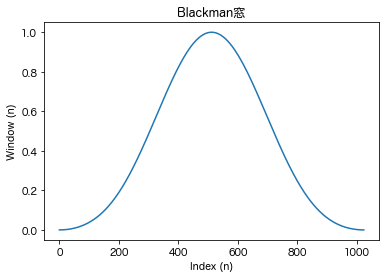

In [7]:
# 窓関数のプロット
plt.figure()
plt.plot(window)
plt.xlabel("Index (n)")
plt.ylabel("Window (n)")
plt.title("Blackman窓")
plt.show()

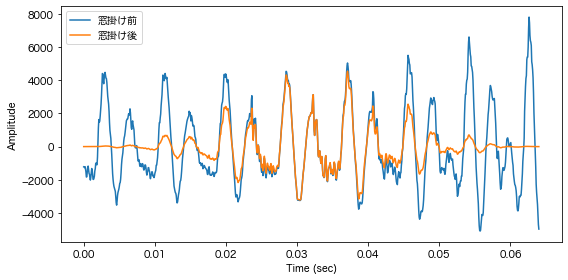

In [8]:
# 窓掛け前後の音声波形を観察
time = np.linspace(0, FRAME_LENGTH / fs, FRAME_LENGTH)  # 時間軸
frame_number = 100  # 第100フレームを取り出す
plt.figure(figsize=(8, 4))
plt.plot(time, frames[frame_number, :], label="Before windowed")
plt.plot(time, windowed_frames[frame_number, :], label="After windowed")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()